# **NLP Medical Question Visualisations**


# Imports

In [1]:
# General imports
import os
from datetime import datetime
import time

import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import uuid

# Plots
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Embedding
from sentence_transformers import SentenceTransformer

# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Tensorflow, Keras
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import copy

# Local Functions Import
#

# Hack to get local imports from src
import sys
from pathlib import Path

src_folder = Path.cwd().parent.joinpath('src')
if not src_folder.exists():
    raise FileNotFoundError(f'{src_folder} does not exist')
sys.path.insert(0, str(src_folder.resolve()))
del src_folder

# Local Functions
from data import run_setup, inspect_query_df

In [2]:
# Check Installs
#

import sys
import platform

print("System Information:")
print("=" * 50)
print(f"Python version: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"Architecture: {platform.architecture()}")
print()

conda_env = os.environ.get('CONDA_DEFAULT_ENV', 'Unknown')
print(f"Conda Environment: {conda_env}")
print()

!pip list | grep -E "(pandas|numpy|matplotlib|scikit-learn|tensorflow|tensorflow-metal|keras-tuner|sentence-transformers)"

System Information:
Python version: 3.11.0 | packaged by conda-forge | (main, Jan 14 2023, 12:25:12) [Clang 14.0.6 ]
Platform: macOS-15.6-arm64-arm-64bit
Architecture: ('64bit', '')

Conda Environment: CDT_DAIR_v1

keras-tuner             1.4.7
matplotlib              3.10.6
matplotlib-inline       0.1.7
numpy                   1.23.5
pandas                  2.3.2
scikit-learn            1.7.1
sentence-transformers   5.1.1
tensorflow              2.12.0
tensorflow-estimator    2.12.0


***
# Functions

***
# Run - Visualisations

In [3]:
# Run Setup
#

run_name = 'Visualisation'
local_project_folder = Path.cwd().parent
data_folder, run_results_folder = run_setup(local_project_folder, 'Visualisation')

Full Dataset Shape: (2916, 6)


,ref-id,source,query,query-label-expert,query-is-non-medical,query-embedding
0,9308c57f,clean,Why do i get a bad headache when i don't eat e...,2,False,"[0.38174020102413714, 0.11417541325524537, 0.1..."
1,6de5e02a,clean,What causes heart rate to suddenly quicken to ...,2,False,"[0.4012427406858807, 0.09471740692465114, 0.20..."
2,e9575e0c,clean,peritonsillar abscess drainage aftercare.. ple...,2,False,"[0.3700802407727396, 0.1721708482145053, -0.02..."
3,192ae40c,clean,How serious is Mono or tonsillitis when untrea...,2,False,"[0.396356177378154, 0.09940979672042548, 0.200..."
4,2ebcbeb4,clean,What are your chances of dying in your sleep?,1,False,"[0.229753869097734, -0.21699528454267994, 0.27..."
5,adc2616a,clean,"Bad reaction to anti-depression meds, wonderin...",2,False,"[0.35593912031571656, 0.03878100537527536, 0.2..."
6,d6624cb0,clean,What are these white bumps in my nostrils? Is ...,1,False,"[0.43858820928601494, 0.20587746449086392, -0...."
7,4ef6580a,clean,What can I do to avoid these nail infections?,1,False,"[0.45035744494997804, 0.10498847283193333, -0...."
8,6492e1e2,clean,What can I do to prevent/reverse possible hear...,2,False,"[0.3074308120509018, 0.05779413317609128, 0.32..."
9,06f70905,clean,Help with a mole,2,False,"[0.30548751142471287, 0.04197911269158253, -0...."


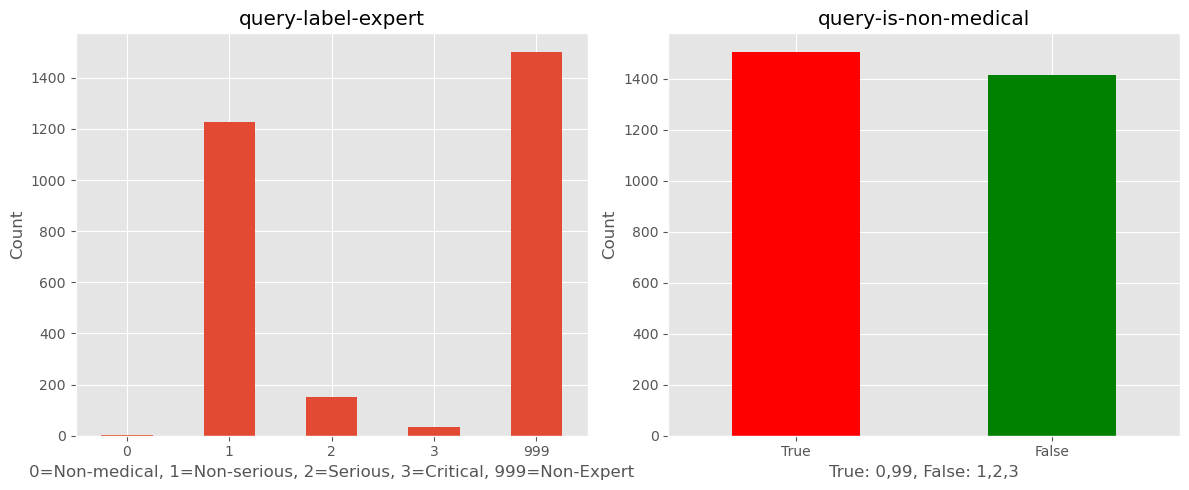

Loaded model: classifer_clean
Model: "classifer_clean"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 output (Dense)              (None, 2)                 258       
                                                                 
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________
Loaded model: classifier_tuned_clean
Model: "classifier_tuned_clean"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2480      
                                                                 
 dense_1 (Dense)             (None, 32)                2592      
                

In [5]:
# Load previous saved queries, embeddings
queries_raw_df = pd.read_pickle(run_results_folder.joinpath("queries_data_raw.pkl"))
queries_clean_df = pd.read_pickle(run_results_folder.joinpath("queries_clean_df.pkl"))
inspect_query_df(queries_clean_df)

# Load previous NN models
model_base = keras.models.load_model(run_results_folder.joinpath("base_model.keras"))
print("Loaded model:", model_base.name)
model_base.summary()

model_tuned = keras.models.load_model(run_results_folder.joinpath("base_model_tuned_clean.keras"))
print("Loaded model:", model_tuned.name)
model_tuned.summary()


In [9]:
import umap

In [ ]:
# NB just the data for the scatter plot and regression line
x = stock_summary['sales_count']
y = stock_summary['sales_total$k']
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Establish the figure, size, title, labels
fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Product Sales Revenue vs Number of Sales. Total: {total_sales}$k')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Sales Value - $k')

# Define the scatter plot & a line, with labels
ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')

# Legend
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')

plt.show()

In [54]:
# Plot Reduced Embeddings
#

import matplotlib.patches as mpatches

def inspect_embeddings(embeddings, label):

    fig, axs = plt.subplots(figsize=(12,8))
    axs.set_title('Embedding Visualisation')
    axs.set_xlabel('Dimension 1')
    axs.set_ylabel('Dimension 2')

    # axs.scatter(embeddings[:,0], embeddings[:,1], s=100, alpha=0.7)
    axs.scatter(embeddings[:,0], embeddings[:,1], c=label, cmap="coolwarm", s=100, alpha=0.7)

    # red_patch = mpatches.Patch(color='#b2182b', label='Medical (True)')
    # blue_patch = mpatches.Patch(color='#2166ac', label='Non-Medical (False)')

    cmap = plt.get_cmap("coolwarm")
    red_patch = mpatches.Patch(color=cmap(1.0), label='Medical (False)')
    blue_patch = mpatches.Patch(color=cmap(0.0), label='Non-Medical (True)')
    # handles = [red_patch, blue_patch]
    axs.legend(handles=[red_patch, blue_patch], title="Labels")

    plt.tight_layout()
    plt.show()


## xxxx

In [59]:
from sklearn.cluster import KMeans


def UMAP_investigate(X_emb_2d, Xs, y):
    #Create dataframe to probe the two classification clusters
    umap_df = pd.DataFrame(X_emb_2d, columns=['UMAP1', 'UMAP2'])
    umap_df['label'] = y

    #use same  clustering with Kmeans as done in Silhouette Score
    kmeans = KMeans(n_clusters=2, random_state=42)
    umap_df['cluster'] = kmeans.fit_predict(X_emb_2d)
    #finds 'mislabeled' samples in the clusters
    misclustered = umap_df[umap_df['label'] != umap_df['cluster']]
    #prints this to see
    print(f"Number of misclustered queries: {len(misclustered)}\n")

    #print out some examples of the misclustered samples to see if there is semantic ambiguity
    mis_idx = misclustered.index
    n_queries = 20
    random_indices = np.random.choice(mis_idx, size=min(n_queries, len(mis_idx)), replace=False)

   
    for i in random_indices:  # show first 10 for brevity
        print(f"Label: {y[i]}, Cluster: {umap_df.loc[i, 'cluster']}")
        print(f"Sentence: {Xs[i]}")
        print("---")

In [60]:
UMAP_investigate(embeddings_umap, sentences, embeddings_label)

Number of misclustered queries: 239

Label: True, Cluster: 0
Sentence: How do you begin healing if you can't afford a therapist?
---
Label: True, Cluster: 0
Sentence: I don't sleep much anymore
---
Label: True, Cluster: 0
Sentence: What if you saw a member of your medical team on OkC?
---
Label: True, Cluster: 0
Sentence: Writer with a question: What kind of medical situations do you have to inform the police about?
---
Label: True, Cluster: 0
Sentence: What Is your interesting deformity whether born with it or an accident or surgical?
---
Label: True, Cluster: 0
Sentence: To people who have struggled with other addictions, how does PMO/MO compare when trying to quit?
---
Label: True, Cluster: 0
Sentence: How likely is it that . . .
---
Label: True, Cluster: 0
Sentence: ELI5:Why do domestic cats have slit-pupil eyes while other cats have round pupils?
---
Label: True, Cluster: 0
Sentence: How many of these showerthoughts are actually showerfeelings?
---
Label: False, Cluster: 1
Sentenc

## xxx

Embedding shape: (2916, 384)


/opt/miniconda3/envs/CDT_DAIR_v1/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


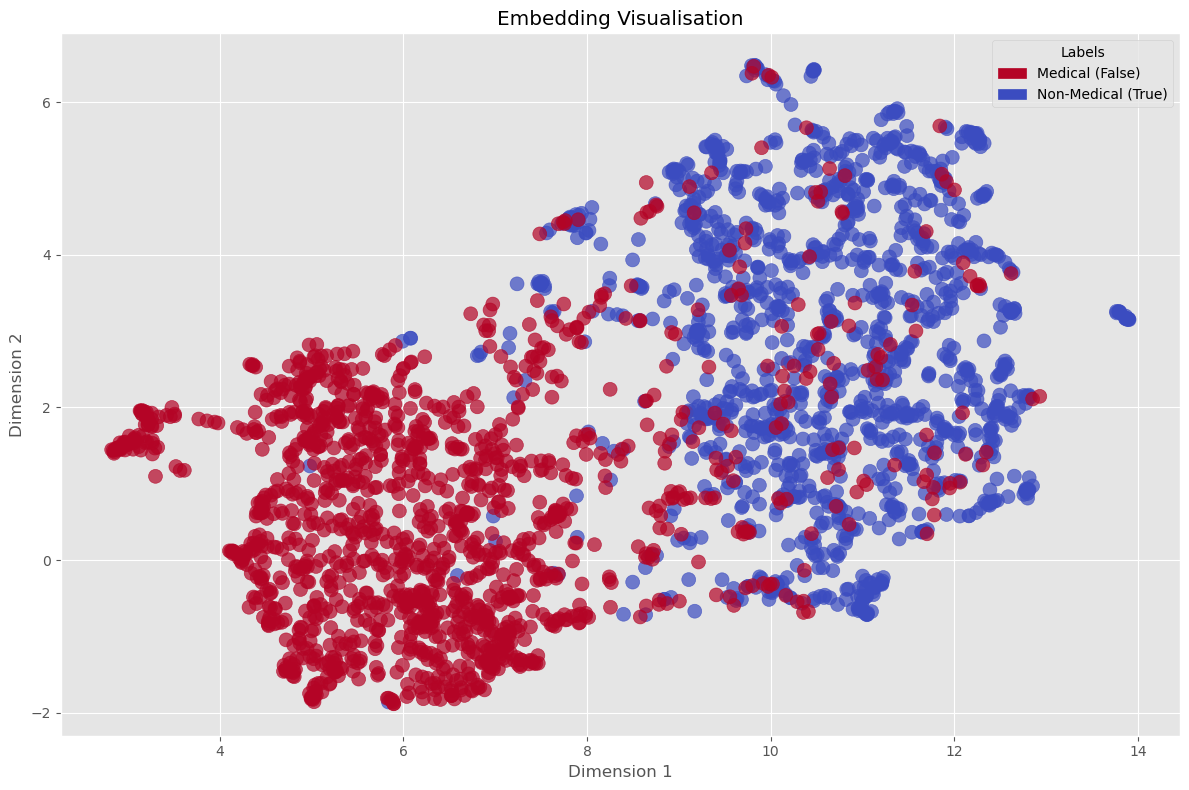

In [58]:
# UMAP on the sentence embeddings

# embeddings = queries_clean_df['query-embedding']
# print(f"Embedding shape: {embeddings.shape}")

sentences = queries_clean_df['query']
embeddings_np = np.vstack(queries_clean_df['query-embedding'].values)
embeddings_label = queries_clean_df['query-is-non-medical']
print(f"Embedding shape: {embeddings_np.shape}")

# UMAP
umap_reducer = umap.UMAP(n_neighbors=8, n_components=2, metric='cosine', min_dist=0.05, random_state=42)
embeddings_umap = umap_reducer.fit_transform(embeddings_np)
inspect_embeddings(embeddings_umap, embeddings_label )


